In [1]:
setwd('/public/home/lyx/00.16S/00BR/00.bamboorat/phyloseq/')
list.files()

[1] "alpha_div.rds"                      "alpha_habitat.pdf"                 
 [3] "alpha_Observed_MRM.pdf"             "alpha_pgls.pdf"                    
 [5] "alpha_Shannon_MRM.pdf"              "alpha_underground.pdf"             
 [7] "ASV_species.xls"                    "ASV_table.tsv"                     
 [9] "beta_div.rds"                       "bray_distance.xls"                 
[11] "bray_MRM.pdf"                       "bray_pcoa.pdf"                     
[13] "bray_pgls.pdf"                      "dna-sequences.fasta"               
[15] "Enterotypes_bamboo.pdf"             "filtered-table.tsv"                
[17] "genus_barplot_Bathyergidae.pdf"     "genus_barplot_habitat.pdf"         
[19] "genus_barplot_Soricidae.pdf"        "genus_barplot_Spalacidae.pdf"      
[21] "genus_barplot_underground.pdf"      "genus_lefse_habitat.pdf"           
[23] "genus_lefse_Spalacidae.pdf"         "genus.pdf"                         
[25] "host_tree_exp_dist.RDS"             "host_tree_exp.nwk"                 
[27] "host_tree.nwk"                      "host_tree.pdf"                     
[29] "host_tree.png"                      "init.R"                            
[31] "metadata.txt"                       "otu_genus.xls"                     
[33] "otu_phylum.xls"                     "OTU_species.xls"                   
[35] "phyloseq_phylum_itol-phylumbar.txt" "phyloseq.rds"                      
[37] "physeq_diet-itol.txt"               "physeq_gut-itol.txt"               
[39] "physeq_life_style-itol.txt"         "physeq_sample_type-itol.txt"       
[41] "rarefied_ASV.xls"                   "rep.fa"                            
[43] "rep.xls"                            "rooted_tree.nwk"                   
[45] "taxa.xls"                           "taxonomy.tsv"                      
[47] "upgma_bray_species.pdf"             "upgma_bray_species.png"

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(ape)
library(stringr)
library(vegan)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-6.1



In [3]:
phyloseq <- readRDS("phyloseq.rds")
phyloseq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4858 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 4858 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4858 tips and 4857 internal nodes ]

In [4]:
####import metadata####
metadata = phyloseq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame 
 metadata %>% nrow %>% print
#columns in metadata table
metadata %>% colnames

[1] 80


[1] "Sampleid"        "Group"           "Class"           "Order"          
 [5] "Family"          "Genus"           "Species"         "Sample_type"    
 [9] "Captive_Wild"    "Domestic_Wild"   "Habitat"         "Diet"           
[13] "Diet_detail"     "Digestive_tract" "Digest_detail"

In [5]:
#import otu
otu = phyloseq %>%
    otu_table() %>%
    as.matrix %>%
    as.data.frame 
otu %>% nrow %>% print

#gather
otu$OTU = rownames(otu) 
rownames(otu) = 1:nrow(otu)
# head(otu)

otu = otu %>%
    gather(sample, count, -OTU) %>%
    group_by(sample) %>%
    mutate(count = count / sum(count) * 100) %>%
    ungroup() %>%
    filter(count > 0)
# head(otu)

#adding host metadata
otu = otu %>%
    inner_join(metadata, c('sample'='Sampleid')) 

# head(otu)

[1] 4858


In [6]:
tax = phyloseq %>%
    tax_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.))
head(tax)

,domain,phylum,class,order,family,genus,species,OTU
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV4221,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,uncultured,uncultured_rumen,ASV4221
ASV5622,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,uncultured,uncultured_rumen,ASV5622
ASV586,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Turicibacter,uncultured_bacterium,ASV586
ASV5507,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelatoclostridiaceae,Asteroleplasma,uncultured_Anaeroplasmataceae,ASV5507
ASV4055,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelatoclostridiaceae,UCG-004,uncultured_bacterium,ASV4055
ASV5428,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelatoclostridiaceae,UCG-004,uncultured_bacterium,ASV5428


relative abundance of genus

In [7]:
#adding genus taxonomy
tax_genus = tax %>% dplyr::select(OTU, genus)

otu_genus = otu %>%
    inner_join(tax_genus, c('OTU'))

head(otu_genus)

OTU,sample,count,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail,genus
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV4034,BMR1,0.051907604,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter,Atopostipes
ASV2320,BMR1,0.060558872,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter,Succiniclasticum
ASV4725,BMR1,0.069210139,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter,Bradymonadales
ASV4348,BMR1,0.008651267,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter,WCHB1-41
ASV1923,BMR1,0.190327883,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter,
ASV1907,BMR1,0.017302535,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter,


In [10]:
#formatting genus_table
otu_genus = otu_genus %>% 
    group_by(sample, genus) %>%
    summarize(count = sum(count)) %>%
    ungroup() %>%
    spread(sample, count, fill=0) %>%
    as.data.frame

head(otu_genus)
# write.table(otu_genus,file = "otu_genus.xls",sep="\t",quote = F)

`summarise()` has grouped output by 'sample'. You can override using the `.groups` argument.


,genus,BMR1,BMR2,BMR3,BMR4,BMR5,BMR6,CBR1,CBR10,CBR2,⋯,SR1,SR2,SR3,SR4,SR5,SR6,WHM1,WHM2,WHM3,WHM4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,,40.63500,42.953543,30.452461,50.428238,41.508781,20.667878,24.9589065,36.46509214,51.0597803,⋯,6.471148023,36.64676875,33.938922052,47.56466822,20.9620209,71.49407,1.4015053,14.9580414,12.466476339,5.095597
2,[Anaerorhabdus]_furcosa_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000000,0.000000
3,[Bacteroides]_pectinophilus_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000000,0.000000
4,[Clostridium]_methylpentosum_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000000,0.000000
5,[Eubacterium]_brachy_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0.00000,0.0000000,0.4325634,0.008651267,0.000000
6,[Eubacterium]_coprostanoligenes_group,3.61623,2.180119,3.027944,7.639069,4.801453,1.730253,0.0519076,0.01730253,0.1470715,⋯,0.008651267,0.01730253,0.008651267,0.06055887,0.0259538,0.00000,0.0259538,0.1643741,0.069210139,0.354702


# lefse

In [12]:
library(microeco)

In [8]:
metadata <- read.table("metadata.txt",header=T,sep="\t",check.names = F,row.names = 1) %>% as.data.frame()
head(metadata)

,Sampleid,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CBR1,CBR1,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR2,CBR2,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR3,CBR3,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR4,CBR4,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR5,CBR5,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR6,CBR6,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Gut,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter


In [11]:
genus <- otu_genus %>% 
    gather(Sampleid,value,-genus) %>% 
    inner_join(metadata,c("Sampleid")) %>% 
    as.data.frame()
head(genus)

,genus,Sampleid,value,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,BMR1,40.63500,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
2,[Anaerorhabdus]_furcosa_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
3,[Bacteroides]_pectinophilus_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
4,[Clostridium]_methylpentosum_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
5,[Eubacterium]_brachy_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
6,[Eubacterium]_coprostanoligenes_group,BMR1,3.61623,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


In [23]:
####underground/aboveground####
#prepare three files
data1 <- genus %>% 
    dplyr::select(Sampleid,value,genus) %>% 
    spread(Sampleid,value) %>% 
    filter(genus != '') %>% 
    as.data.frame()
row.names(data1) <- data1$genus
tax1 <- data1 %>% dplyr::select(genus) %>% as.data.frame()
head(tax1)
data1 <- data1 %>% dplyr::select(-genus) %>% as.data.frame()
head(data1)
sample1 <- metadata
head(sample1)

#prepare dataset
dataset <- microtable$new(sample_table = sample1,
                          otu_table = data1, 
                          tax_table = tax1)
dataset

#执行lefse分析
lefse <- trans_diff$new(dataset = dataset, 
                        method = "lefse", 
                        group = "Habitat", 
                        alpha = 0.01, 
                        lefse_subgroup = NULL)
#查看分析结果
head(lefse$res_diff)

,genus
,<chr>
[Anaerorhabdus]_furcosa_group,[Anaerorhabdus]_furcosa_group
[Bacteroides]_pectinophilus_group,[Bacteroides]_pectinophilus_group
[Clostridium]_methylpentosum_group,[Clostridium]_methylpentosum_group
[Eubacterium]_brachy_group,[Eubacterium]_brachy_group
[Eubacterium]_coprostanoligenes_group,[Eubacterium]_coprostanoligenes_group
[Eubacterium]_hallii_group,[Eubacterium]_hallii_group


,BMR1,BMR2,BMR3,BMR4,BMR5,BMR6,CBR1,CBR10,CBR2,CBR3,⋯,SR1,SR2,SR3,SR4,SR5,SR6,WHM1,WHM2,WHM3,WHM4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
[Anaerorhabdus]_furcosa_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000
[Bacteroides]_pectinophilus_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000
[Clostridium]_methylpentosum_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000
[Eubacterium]_brachy_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0,0.0000000,0.4325634,0.008651267,0.000000
[Eubacterium]_coprostanoligenes_group,3.61623,2.180119,3.027944,7.639069,4.801453,1.730253,0.0519076,0.01730253,0.1470715,2.015745,⋯,0.008651267,0.01730253,0.008651267,0.06055887,0.0259538,0,0.0259538,0.1643741,0.069210139,0.354702
[Eubacterium]_hallii_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000


,Sampleid,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CBR1,CBR1,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR2,CBR2,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR3,CBR3,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR4,CBR4,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR5,CBR5,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR6,CBR6,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Gut,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter


microtable-class object:
sample_table have 80 rows and 15 columns
otu_table have 461 rows and 80 columns
tax_table have 461 rows and 1 columns

No taxa_abund list found. Calculate it with cal_abund function ...

The result is stored in object$taxa_abund ...

461 input features ...

459 features are remained after removing unknown features ...

Start Kruskal-Wallis rank sum test for Habitat ...

48 taxa found significant ...

After P value adjustment, 11 taxa found significant ...

Minimum LDA score: 3.37892388536699 maximum LDA score: 4.22676083487503

Taxa abundance table is stored in object$res_abund ...

lefse analysis result is stored in object$res_diff ...



,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Treponema,Aboveground - Underground,Treponema,LEfSe,Aboveground,4.226761,6.250633e-05,3.586301e-03,**
NK4A214_group,Aboveground - Underground,NK4A214_group,LEfSe,Underground,4.011249,3.828687e-10,1.757367e-07,***
Alistipes,Aboveground - Underground,Alistipes,LEfSe,Aboveground,4.008766,1.024260e-05,9.402710e-04,***
Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium,Aboveground - Underground,Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium,LEfSe,Aboveground,3.884481,8.717814e-07,1.000369e-04,***
Rikenellaceae_RC9_gut_group,Aboveground - Underground,Rikenellaceae_RC9_gut_group,LEfSe,Underground,3.784546,2.275084e-05,1.557585e-03,**
Myroides,Aboveground - Underground,Myroides,LEfSe,Aboveground,3.743381,4.149866e-07,6.349295e-05,***


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


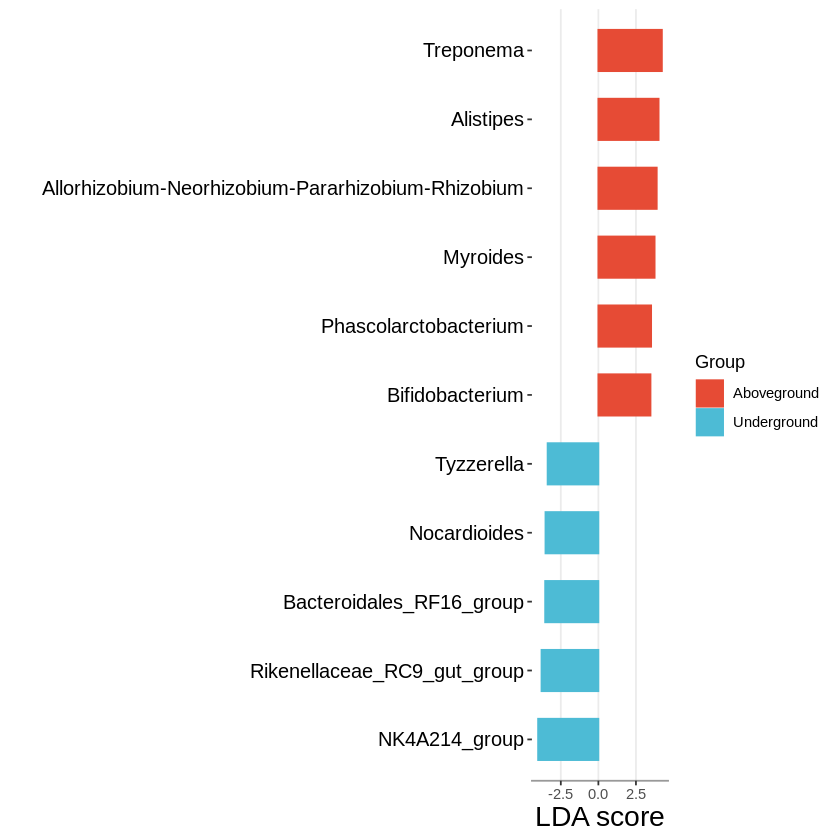

In [24]:
lefse$plot_diff_bar(use_number = 1:11, 
                    width = 0.6, 
                    group_order = c("Aboveground","Underground")) +
  ggsci::scale_color_npg() +
  ggsci::scale_fill_npg()

ggsave("genus_lefse_habitat.pdf",width = 8,height = 3,dpi = 1000)

In [18]:
####underground_Soricidae####
#prepare three files
data1 <- genus %>% 
    filter(Order != "Rodentia") %>%
    dplyr::select(Sampleid,value,genus) %>% 
    spread(Sampleid,value) %>% 
    filter(genus != '') %>% 
    as.data.frame()
row.names(data1) <- data1$genus
tax1 <- data1 %>% dplyr::select(genus) %>% as.data.frame()
head(tax1)
data1 <- data1 %>% dplyr::select(-genus) %>% as.data.frame()
head(data1)
sample1 <- metadata %>% filter(Order != "Rodentia")
head(sample1)

#prepare dataset
dataset <- microtable$new(sample_table = sample1,
                          otu_table = data1, 
                          tax_table = tax1)
dataset

#执行lefse分析
lefse <- trans_diff$new(dataset = dataset, 
                        method = "lefse", 
                        group = "Habitat", 
                        alpha = 0.01, 
                        lefse_subgroup = NULL)
#查看分析结果
head(lefse$res_diff)

,genus
,<chr>
[Anaerorhabdus]_furcosa_group,[Anaerorhabdus]_furcosa_group
[Bacteroides]_pectinophilus_group,[Bacteroides]_pectinophilus_group
[Clostridium]_methylpentosum_group,[Clostridium]_methylpentosum_group
[Eubacterium]_brachy_group,[Eubacterium]_brachy_group
[Eubacterium]_coprostanoligenes_group,[Eubacterium]_coprostanoligenes_group
[Eubacterium]_hallii_group,[Eubacterium]_hallii_group


,SM1,SM2,SM3,SM4,SM5,SM6,SR1,SR2,SR3,SR4,SR5,SR6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
[Anaerorhabdus]_furcosa_group,0.008651267,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0
[Bacteroides]_pectinophilus_group,0.000000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0
[Clostridium]_methylpentosum_group,0.034605070,0.00000000,0.03460507,0.0000000,0.00000000,0.0000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0
[Eubacterium]_brachy_group,0.000000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0
[Eubacterium]_coprostanoligenes_group,0.320096894,0.01730253,0.08651267,0.0259538,0.03460507,0.1557228,0.008651267,0.01730253,0.008651267,0.06055887,0.0259538,0
[Eubacterium]_hallii_group,0.000000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000,0


,Sampleid,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SR1,SR1,Soricidae and relatives,Mammalia,Eulipotyphla,Soricidae,Sorex,Sorex araneus,Gut,Wild,Wild,Aboveground,Carnivore,Insectivore,Simple,Simple
SR2,SR2,Soricidae and relatives,Mammalia,Eulipotyphla,Soricidae,Sorex,Sorex araneus,Gut,Wild,Wild,Aboveground,Carnivore,Insectivore,Simple,Simple
SR3,SR3,Soricidae and relatives,Mammalia,Eulipotyphla,Soricidae,Sorex,Sorex araneus,Gut,Wild,Wild,Aboveground,Carnivore,Insectivore,Simple,Simple
SR4,SR4,Soricidae and relatives,Mammalia,Eulipotyphla,Soricidae,Sorex,Sorex araneus,Gut,Wild,Wild,Aboveground,Carnivore,Insectivore,Simple,Simple
SR5,SR5,Soricidae and relatives,Mammalia,Eulipotyphla,Soricidae,Sorex,Sorex araneus,Gut,Wild,Wild,Aboveground,Carnivore,Insectivore,Simple,Simple
SR6,SR6,Soricidae and relatives,Mammalia,Eulipotyphla,Soricidae,Sorex,Sorex araneus,Gut,Wild,Wild,Aboveground,Carnivore,Insectivore,Simple,Simple


216 taxa with 0 abundance are removed from the otu_table ...



microtable-class object:
sample_table have 12 rows and 15 columns
otu_table have 245 rows and 12 columns
tax_table have 461 rows and 1 columns

No taxa_abund list found. Calculate it with cal_abund function ...

The row number of tax_table is not equal to that of otu_table ...

Automatically applying tidy_dataset() function to trim the data ...



microtable-class object:
sample_table have 12 rows and 15 columns
otu_table have 245 rows and 12 columns
tax_table have 245 rows and 1 columns


The result is stored in object$taxa_abund ...

245 input features ...

243 features are remained after removing unknown features ...

Start Kruskal-Wallis rank sum test for Habitat ...

27 taxa found significant ...

After P value adjustment, 0 taxa found significant ...



ERROR: Error in private$check_taxa_number(sel_taxa, p_adjust_method): No significant feature found! To disable p value adjustment, please use p_adjust_method = "none"!


In [20]:
####underground_Spalacidae####
#prepare three files
data1 <- genus %>% 
    filter(Group == "Spalacidae and relatives") %>%
    dplyr::select(Sampleid,value,genus) %>% 
    spread(Sampleid,value) %>% 
    filter(genus != '') %>% 
    as.data.frame()
row.names(data1) <- data1$genus
tax1 <- data1 %>% dplyr::select(genus) %>% as.data.frame()
head(tax1)
data1 <- data1 %>% dplyr::select(-genus) %>% as.data.frame()
head(data1)
sample1 <- metadata %>% filter(Group == "Spalacidae and relatives")
head(sample1)

#prepare dataset
dataset <- microtable$new(sample_table = sample1,
                          otu_table = data1, 
                          tax_table = tax1)
dataset

#执行lefse分析
lefse <- trans_diff$new(dataset = dataset, 
                        method = "lefse", 
                        group = "Habitat", 
                        alpha = 0.01, 
                        lefse_subgroup = NULL)
#查看分析结果
head(lefse$res_diff)

,genus
,<chr>
[Anaerorhabdus]_furcosa_group,[Anaerorhabdus]_furcosa_group
[Bacteroides]_pectinophilus_group,[Bacteroides]_pectinophilus_group
[Clostridium]_methylpentosum_group,[Clostridium]_methylpentosum_group
[Eubacterium]_brachy_group,[Eubacterium]_brachy_group
[Eubacterium]_coprostanoligenes_group,[Eubacterium]_coprostanoligenes_group
[Eubacterium]_hallii_group,[Eubacterium]_hallii_group


,BMR1,BMR2,BMR3,BMR4,BMR5,BMR6,CBR1,CBR10,CBR2,CBR3,⋯,SCFM1,SCFM2,SCFM3,SCFM4,SCFM5,SCFM6,WHM1,WHM2,WHM3,WHM4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
[Anaerorhabdus]_furcosa_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000
[Bacteroides]_pectinophilus_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000
[Clostridium]_methylpentosum_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000
[Eubacterium]_brachy_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.4325634,0.008651267,0.000000
[Eubacterium]_coprostanoligenes_group,3.61623,2.180119,3.027944,7.639069,4.801453,1.730253,0.0519076,0.01730253,0.1470715,2.015745,⋯,1.211177,0.06921014,0.1211177,0.2335842,0.2768406,0,0.0259538,0.1643741,0.069210139,0.354702
[Eubacterium]_hallii_group,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.00000000,0.0000000,0.000000,⋯,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000000,0.000000


,Sampleid,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CBR1,CBR1,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR2,CBR2,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR3,CBR3,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR4,CBR4,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR5,CBR5,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Feces,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter
CBR6,CBR6,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Rhizomys,Rhizomys sinensis,Gut,Wild,Wild,Underground,Herbivore,Bamboo,Hindgut fermentation,Cecum fermenter


161 taxa with 0 abundance are removed from the otu_table ...



microtable-class object:
sample_table have 47 rows and 15 columns
otu_table have 300 rows and 47 columns
tax_table have 461 rows and 1 columns

No taxa_abund list found. Calculate it with cal_abund function ...

The row number of tax_table is not equal to that of otu_table ...

Automatically applying tidy_dataset() function to trim the data ...



microtable-class object:
sample_table have 47 rows and 15 columns
otu_table have 300 rows and 47 columns
tax_table have 300 rows and 1 columns


The result is stored in object$taxa_abund ...

300 input features ...

298 features are remained after removing unknown features ...

Start Kruskal-Wallis rank sum test for Habitat ...

63 taxa found significant ...

After P value adjustment, 24 taxa found significant ...

Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Minimum LDA score: 2.54165945086013 maximu

,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Muribaculaceae,Aboveground - Underground,Muribaculaceae,LEfSe,Underground,5.069786,8.006239e-05,1.704185e-03,**
Treponema,Aboveground - Underground,Treponema,LEfSe,Aboveground,4.427958,2.055824e-04,3.403531e-03,**
UCG-010,Aboveground - Underground,UCG-010,LEfSe,Aboveground,4.370091,5.315071e-05,1.218378e-03,**
Alistipes,Aboveground - Underground,Alistipes,LEfSe,Aboveground,4.164141,4.315520e-07,2.208928e-05,***
NK4A214_group,Aboveground - Underground,NK4A214_group,LEfSe,Underground,4.080979,6.077789e-10,1.811181e-07,***
Leuconostoc,Aboveground - Underground,Leuconostoc,LEfSe,Aboveground,4.025405,6.293529e-04,7.814466e-03,**


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


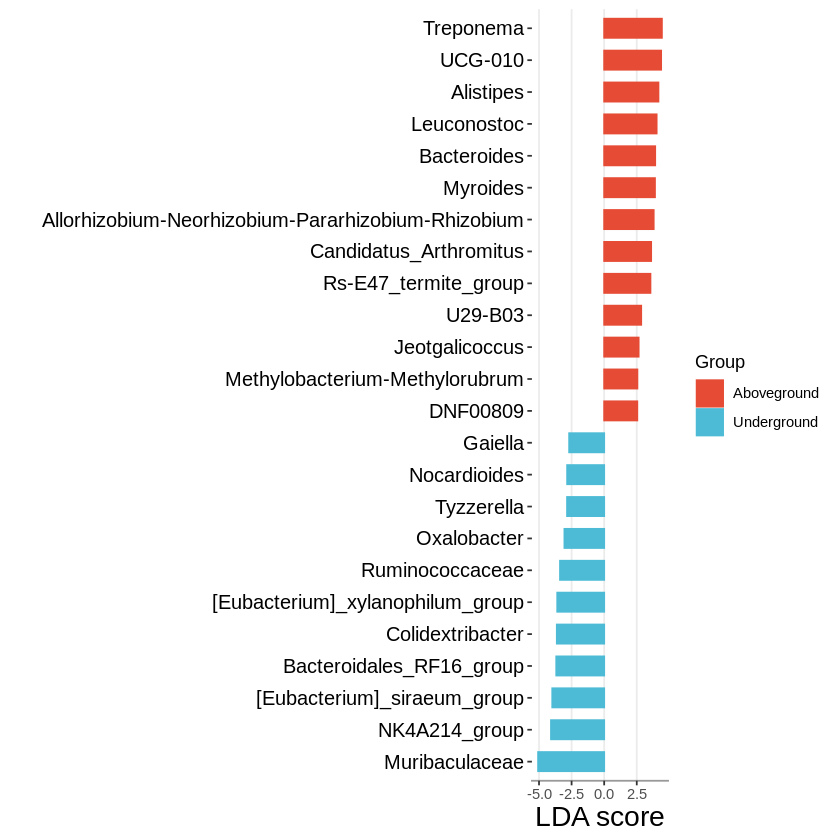

In [21]:
lefse$plot_diff_bar(use_number = 1:24, 
                    width = 0.6, 
                    group_order = c("Aboveground","Underground")) +
  ggsci::scale_color_npg() +
  ggsci::scale_fill_npg()

ggsave("genus_lefse_Spalacidae.pdf",width = 8,height = 4,dpi = 1000)

In [22]:
####underground_Bathyergidae####
#prepare three files
data1 <- genus %>% 
    filter(Group == "Bathyergidae and relatives") %>%
    dplyr::select(Sampleid,value,genus) %>% 
    spread(Sampleid,value) %>% 
    filter(genus != '') %>% 
    as.data.frame()
row.names(data1) <- data1$genus
tax1 <- data1 %>% dplyr::select(genus) %>% as.data.frame()
head(tax1)
data1 <- data1 %>% dplyr::select(-genus) %>% as.data.frame()
head(data1)
sample1 <- metadata %>% filter(Group == "Bathyergidae and relatives") 
head(sample1)

#prepare dataset
dataset <- microtable$new(sample_table = sample1,
                          otu_table = data1, 
                          tax_table = tax1)
dataset

#执行lefse分析
lefse <- trans_diff$new(dataset = dataset, 
                        method = "lefse", 
                        group = "Habitat", 
                        alpha = 0.01, 
                        lefse_subgroup = NULL)
#查看分析结果
head(lefse$res_diff)

,genus
,<chr>
[Anaerorhabdus]_furcosa_group,[Anaerorhabdus]_furcosa_group
[Bacteroides]_pectinophilus_group,[Bacteroides]_pectinophilus_group
[Clostridium]_methylpentosum_group,[Clostridium]_methylpentosum_group
[Eubacterium]_brachy_group,[Eubacterium]_brachy_group
[Eubacterium]_coprostanoligenes_group,[Eubacterium]_coprostanoligenes_group
[Eubacterium]_hallii_group,[Eubacterium]_hallii_group


,DMR1,DMR2,DMR3,DMR4,DMR5,DMR6,NMR1,NMR2,NMR3,NMR4,⋯,NMR6,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PM1,PM2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
[Anaerorhabdus]_furcosa_group,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.0259538,0.0000000,0.04325634,⋯,0.000000,0.000000,0.000000,0.000000,0.04325634,0.121117744,0.00000000,0.00000000,0,0.02595380
[Bacteroides]_pectinophilus_group,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.000000,0.000000,0.000000,0.000000,0.35470196,0.276840557,0.00000000,0.00000000,0,0.00000000
[Clostridium]_methylpentosum_group,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.00000000
[Eubacterium]_brachy_group,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000000,0.008651267,0.00000000,0.00000000,0,0.06055887
[Eubacterium]_coprostanoligenes_group,0.3287482,4.040142,0.1989792,1.263085,2.110909,0.3979583,0.9602907,1.7735098,0.7699628,1.05545462,⋯,1.038152,1.816766,1.877325,8.011074,0.72670646,1.323643914,0.04325634,0.03460507,0,0.29414309
[Eubacterium]_hallii_group,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.03460507


,Sampleid,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NMR1,NMR1,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Heterocephalus,Heterocephalus glaber,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
NMR2,NMR2,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Heterocephalus,Heterocephalus glaber,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
NMR3,NMR3,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Heterocephalus,Heterocephalus glaber,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
NMR4,NMR4,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Heterocephalus,Heterocephalus glaber,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
NMR5,NMR5,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Heterocephalus,Heterocephalus glaber,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
NMR6,NMR6,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Heterocephalus,Heterocephalus glaber,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


191 taxa with 0 abundance are removed from the otu_table ...



microtable-class object:
sample_table have 21 rows and 15 columns
otu_table have 270 rows and 21 columns
tax_table have 461 rows and 1 columns

No taxa_abund list found. Calculate it with cal_abund function ...

The row number of tax_table is not equal to that of otu_table ...

Automatically applying tidy_dataset() function to trim the data ...



microtable-class object:
sample_table have 21 rows and 15 columns
otu_table have 270 rows and 21 columns
tax_table have 270 rows and 1 columns


The result is stored in object$taxa_abund ...

270 input features ...

268 features are remained after removing unknown features ...

Start Kruskal-Wallis rank sum test for Habitat ...

29 taxa found significant ...

After P value adjustment, 3 taxa found significant ...

Minimum LDA score: 3.70763073692309 maximum LDA score: 4.55354311366293

Taxa abundance table is stored in object$res_abund ...

lefse analysis result is stored in object$res_diff ...



,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Acinetobacter,Aboveground - Underground,Acinetobacter,LEfSe,Aboveground,4.553543,9.477225e-05,0.008466321,**
Lachnospiraceae_NK4A136_group,Aboveground - Underground,Lachnospiraceae_NK4A136_group,LEfSe,Aboveground,3.838331,9.477225e-05,0.008466321,**
Phascolarctobacterium,Aboveground - Underground,Phascolarctobacterium,LEfSe,Aboveground,3.707631,9.477225e-05,0.008466321,**


# comparision based on genus

In [27]:
####underground####
genus_merge <- genus %>%  
    filter(genus != '') %>% 
    as.data.frame()
head(genus_merge)

select <- genus_merge %>% 
    dplyr::select(genus,value) %>% 
    group_by(genus) %>% 
    summarise(value=mean(value))
select <- arrange(select,desc(value)) %>% as.data.frame()
a <- head(select,10)$genus

,genus,Sampleid,value,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,[Anaerorhabdus]_furcosa_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
2,[Bacteroides]_pectinophilus_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
3,[Clostridium]_methylpentosum_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
4,[Eubacterium]_brachy_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
5,[Eubacterium]_coprostanoligenes_group,BMR1,3.61623,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
6,[Eubacterium]_hallii_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


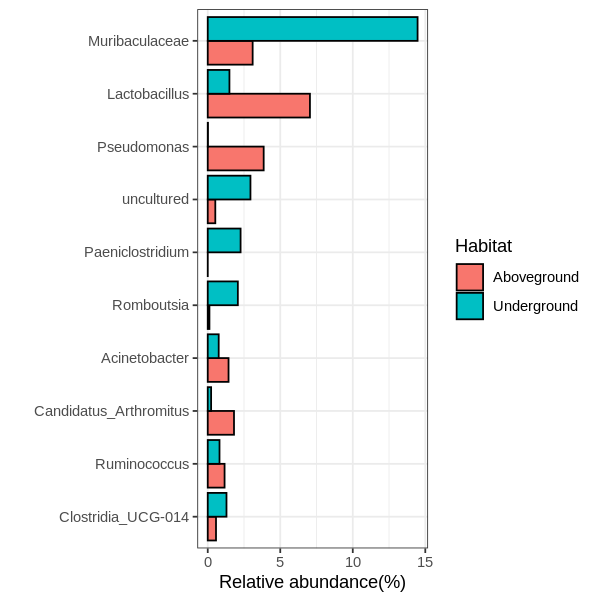

In [30]:
####visualization####
p <- ggplot(genus_merge %>% filter(genus %in% a),aes(x=reorder(genus,value),y=value,fill=Habitat)) +
    geom_bar(stat = "summary",fun=mean,color="black",position = position_dodge()) +    
#     geom_boxplot() +
    coord_flip()+
    labs(x='',y='Relative abundance(%)')+
    theme_bw()
options(repr.plot.width=5, repr.plot.height=5)
plot(p)
ggsave("genus_barplot_underground.pdf",width = 5,height = 5,dpi = 1000)

In [33]:
####wilcox test####
library(rstatix)
genus_merge %>% 
    filter(genus %in% a) %>%  
    group_by(genus) %>% 
    wilcox_test(value ~ Habitat) %>%  
    adjust_pvalue(method = "BH") %>%
    filter(p.adj <=0.05) %>% 
    as.data.frame()

genus,.y.,group1,group2,n1,n2,statistic,p,p.adj
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Clostridia_UCG-014,value,Aboveground,Underground,40,40,305.5,1.93e-06,6.433333e-06
Lactobacillus,value,Aboveground,Underground,40,40,538.0,1.17e-02,2.560000e-02
Muribaculaceae,value,Aboveground,Underground,40,40,303.5,1.82e-06,6.433333e-06
Pseudomonas,value,Aboveground,Underground,40,40,1027.5,1.28e-02,2.560000e-02
uncultured,value,Aboveground,Underground,40,40,255.5,1.65e-07,1.650000e-06


In [34]:
####Soricidae####
genus_merge <- genus %>%  
    filter(genus != '') %>% 
    filter(Order != "Rodentia") %>% 
    as.data.frame()
head(genus_merge)

select <- genus_merge %>% 
    dplyr::select(genus,value) %>% 
    group_by(genus) %>% 
    summarise(value=mean(value))
select <- arrange(select,desc(value)) %>% as.data.frame()
a <- head(select,10)$genus

,genus,Sampleid,value,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,[Anaerorhabdus]_furcosa_group,SM1,0.008651267,Soricidae and relatives,Mammalia,Eulipotyphla,Talpidae,Scaptochirus,Scaptochirus moschatus,Gut,Wild,Wild,Underground,Omnivore,Omnivore,Simple,Simple
2,[Bacteroides]_pectinophilus_group,SM1,0.000000000,Soricidae and relatives,Mammalia,Eulipotyphla,Talpidae,Scaptochirus,Scaptochirus moschatus,Gut,Wild,Wild,Underground,Omnivore,Omnivore,Simple,Simple
3,[Clostridium]_methylpentosum_group,SM1,0.034605070,Soricidae and relatives,Mammalia,Eulipotyphla,Talpidae,Scaptochirus,Scaptochirus moschatus,Gut,Wild,Wild,Underground,Omnivore,Omnivore,Simple,Simple
4,[Eubacterium]_brachy_group,SM1,0.000000000,Soricidae and relatives,Mammalia,Eulipotyphla,Talpidae,Scaptochirus,Scaptochirus moschatus,Gut,Wild,Wild,Underground,Omnivore,Omnivore,Simple,Simple
5,[Eubacterium]_coprostanoligenes_group,SM1,0.320096894,Soricidae and relatives,Mammalia,Eulipotyphla,Talpidae,Scaptochirus,Scaptochirus moschatus,Gut,Wild,Wild,Underground,Omnivore,Omnivore,Simple,Simple
6,[Eubacterium]_hallii_group,SM1,0.000000000,Soricidae and relatives,Mammalia,Eulipotyphla,Talpidae,Scaptochirus,Scaptochirus moschatus,Gut,Wild,Wild,Underground,Omnivore,Omnivore,Simple,Simple


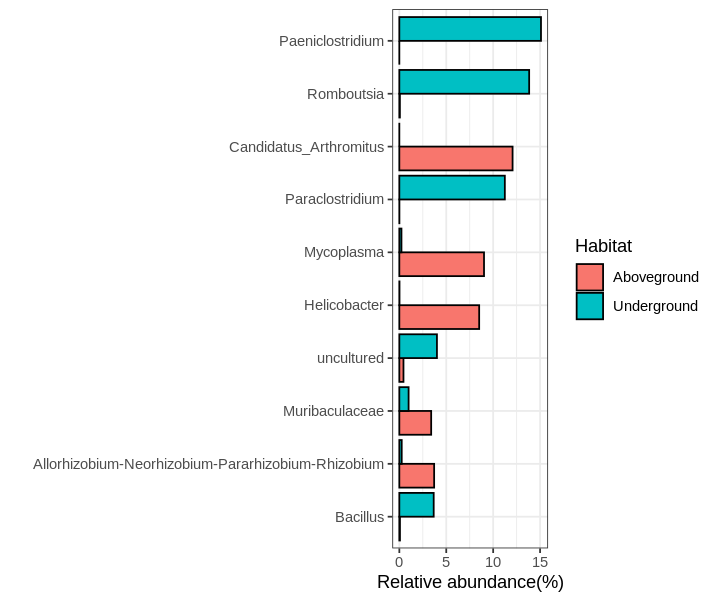

In [38]:
####visualization####
p <- ggplot(genus_merge %>% filter(genus %in% a),aes(x=reorder(genus,value),y=value,fill=Habitat)) +
    geom_bar(stat = "summary",fun=mean,color="black",position = position_dodge()) +    
    coord_flip()+
    labs(x='',y='Relative abundance(%)')+
    theme_bw()
options(repr.plot.width=6, repr.plot.height=5)
plot(p)
ggsave("genus_barplot_Soricidae.pdf",width = 6,height = 5,dpi = 1000)

In [37]:
genus_merge %>% 
    filter(genus %in% a) %>%  
    group_by(genus) %>% 
    wilcox_test(value ~ Habitat) %>%  
    adjust_pvalue(method = "BH") %>%
    filter(p.adj <=0.05) %>% 
    as.data.frame()

genus,.y.,group1,group2,n1,n2,statistic,p,p.adj
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Candidatus_Arthromitus,value,Aboveground,Underground,6,6,36.0,0.00278,0.009266667
Helicobacter,value,Aboveground,Underground,6,6,36.0,0.00434,0.010850000
Mycoplasma,value,Aboveground,Underground,6,6,36.0,0.00216,0.009266667
Paeniclostridium,value,Aboveground,Underground,6,6,0.0,0.00278,0.009266667
Paraclostridium,value,Aboveground,Underground,6,6,3.5,0.01670,0.027833333
Romboutsia,value,Aboveground,Underground,6,6,2.0,0.01240,0.024800000


In [39]:
####Spalacidae####
genus_merge <- genus %>%  
    filter(genus != '') %>% 
    filter(Group == "Spalacidae and relatives") %>% 
    as.data.frame()
head(genus_merge)

select <- genus_merge %>% 
    dplyr::select(genus,value) %>% 
    group_by(genus) %>% 
    summarise(value=mean(value))
select <- arrange(select,desc(value)) %>% as.data.frame()
a <- head(select,10)$genus

,genus,Sampleid,value,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,[Anaerorhabdus]_furcosa_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
2,[Bacteroides]_pectinophilus_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
3,[Clostridium]_methylpentosum_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
4,[Eubacterium]_brachy_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
5,[Eubacterium]_coprostanoligenes_group,BMR1,3.61623,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
6,[Eubacterium]_hallii_group,BMR1,0.00000,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


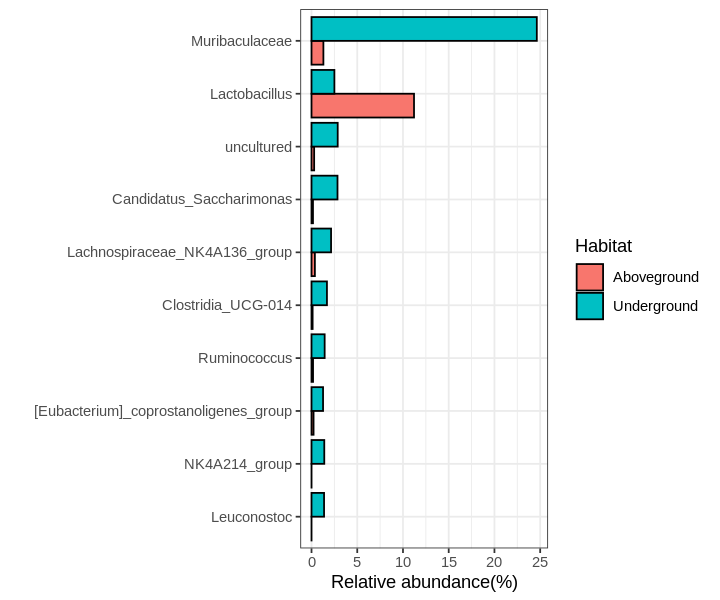

In [40]:
####visualization####
p <- ggplot(genus_merge %>% filter(genus %in% a),aes(x=reorder(genus,value),y=value,fill=Habitat)) +
    geom_bar(stat = "summary",fun=mean,color="black",position = position_dodge()) +    
    coord_flip()+
    labs(x='',y='Relative abundance(%)')+
    theme_bw()
options(repr.plot.width=6, repr.plot.height=5)
plot(p)
ggsave("genus_barplot_Spalacidae.pdf",width = 6,height = 5,dpi = 1000)

In [41]:
genus_merge %>% 
    filter(genus %in% a) %>%  
    group_by(genus) %>% 
    wilcox_test(value ~ Habitat) %>%  
    adjust_pvalue(method = "BH") %>%
    filter(p.adj <=0.05) %>% 
    as.data.frame()

genus,.y.,group1,group2,n1,n2,statistic,p,p.adj
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Candidatus_Saccharimonas,value,Aboveground,Underground,25,22,84.0,4.68e-05,9.360000e-05
Clostridia_UCG-014,value,Aboveground,Underground,25,22,33.5,2.56e-07,6.400000e-07
Lachnospiraceae_NK4A136_group,value,Aboveground,Underground,25,22,126.0,1.44e-03,2.057143e-03
Lactobacillus,value,Aboveground,Underground,25,22,160.0,1.46e-02,1.825000e-02
Leuconostoc,value,Aboveground,Underground,25,22,156.0,6.63e-04,1.105000e-03
Muribaculaceae,value,Aboveground,Underground,25,22,3.0,7.08e-09,3.540000e-08
NK4A214_group,value,Aboveground,Underground,25,22,0.0,6.52e-10,6.520000e-09
uncultured,value,Aboveground,Underground,25,22,24.0,9.24e-08,3.080000e-07


In [42]:
####Bathyergidae####
genus_merge <- genus %>%  
    filter(genus != '') %>% 
    filter(Group == "Bathyergidae and relatives") %>% 
    as.data.frame()
head(genus_merge)

select <- genus_merge %>% 
    dplyr::select(genus,value) %>% 
    group_by(genus) %>% 
    summarise(value=mean(value))
select <- arrange(select,desc(value)) %>% as.data.frame()
a <- head(select,10)$genus

,genus,Sampleid,value,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,[Anaerorhabdus]_furcosa_group,DMR1,0.0000000,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Fukomys,Fukomys damarensis,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
2,[Bacteroides]_pectinophilus_group,DMR1,0.0000000,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Fukomys,Fukomys damarensis,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
3,[Clostridium]_methylpentosum_group,DMR1,0.0000000,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Fukomys,Fukomys damarensis,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
4,[Eubacterium]_brachy_group,DMR1,0.0000000,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Fukomys,Fukomys damarensis,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
5,[Eubacterium]_coprostanoligenes_group,DMR1,0.3287482,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Fukomys,Fukomys damarensis,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
6,[Eubacterium]_hallii_group,DMR1,0.0000000,Bathyergidae and relatives,Mammalia,Rodentia,Bathyergidae,Fukomys,Fukomys damarensis,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


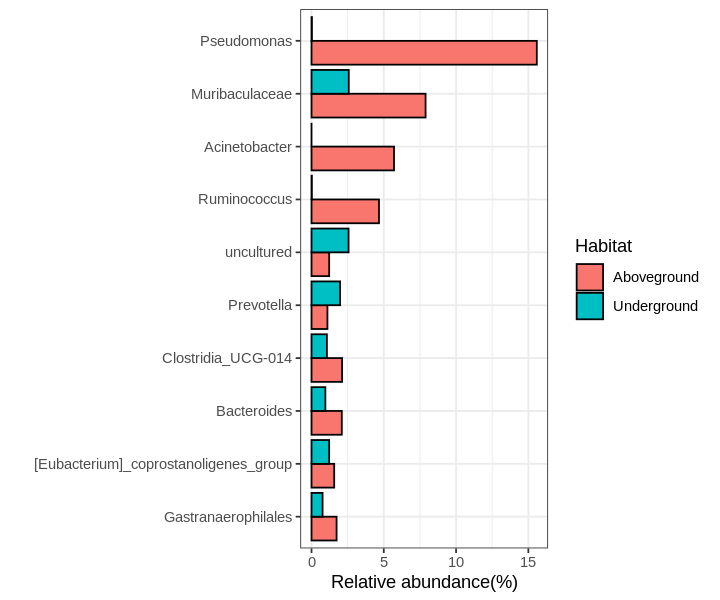

In [43]:
####visualization####
p <- ggplot(genus_merge %>% filter(genus %in% a),aes(x=reorder(genus,value),y=value,fill=Habitat)) +
    geom_bar(stat = "summary",fun=mean,color="black",position = position_dodge()) +    
    coord_flip()+
    labs(x='',y='Relative abundance(%)')+
    theme_bw()
options(repr.plot.width=6, repr.plot.height=5)
plot(p)
ggsave("genus_barplot_Bathyergidae.pdf",width = 6,height = 5,dpi = 1000)

In [44]:
genus_merge %>% 
    filter(genus %in% a) %>%  
    group_by(genus) %>% 
    wilcox_test(value ~ Habitat) %>%  
    adjust_pvalue(method = "BH") %>%
    filter(p.adj <=0.05) %>% 
    as.data.frame()

genus,.y.,group1,group2,n1,n2,statistic,p,p.adj
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Acinetobacter,value,Aboveground,Underground,9,12,102,0.000112,0.00112
Ruminococcus,value,Aboveground,Underground,9,12,98,0.001060,0.00530


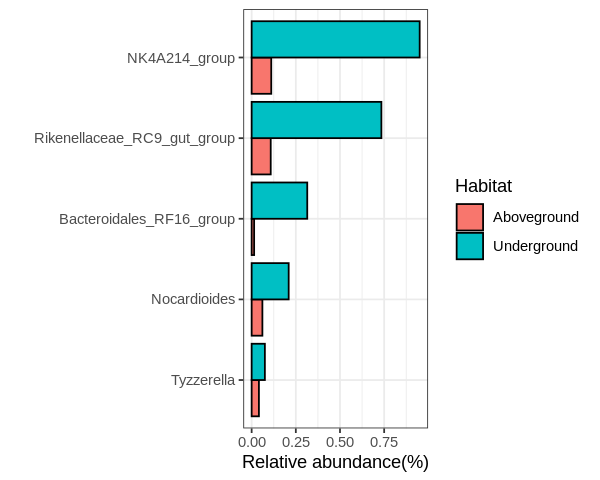

In [64]:
a <- c(" Tyzzerella"," Nocardioides"," Bacteroidales_RF16_group"," Rikenellaceae_RC9_gut_group"," NK4A214_group")
# ####visualization####
p <- ggplot(genus %>% filter(genus != '') %>% filter(genus %in% a),aes(x=reorder(genus,value),y=value,fill=Habitat)) +
    geom_bar(stat = "summary",fun=mean,color="black",position = position_dodge()) +    
    coord_flip()+
    labs(x='',y='Relative abundance(%)')+
    theme_bw()
options(repr.plot.width=5, repr.plot.height=4)
plot(p)
ggsave("genus_barplot_habitat.pdf",width = 5,height = 4,dpi = 1000)

In [65]:
genus %>% 
    filter(genus != '') %>% 
    filter(genus %in% a) %>%  
    group_by(genus) %>% 
    wilcox_test(value ~ Habitat) %>%  
    adjust_pvalue(method = "BH") %>%
    filter(p.adj <=0.05) %>% 
    as.data.frame()

genus,.y.,group1,group2,n1,n2,statistic,p,p.adj
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Bacteroidales_RF16_group,value,Aboveground,Underground,40,40,333.0,3.14e-07,7.850000e-07
NK4A214_group,value,Aboveground,Underground,40,40,198.5,2.26e-09,1.130000e-08
Nocardioides,value,Aboveground,Underground,40,40,414.0,7.97e-05,9.962500e-05
Rikenellaceae_RC9_gut_group,value,Aboveground,Underground,40,40,315.5,1.37e-06,2.283333e-06
Tyzzerella,value,Aboveground,Underground,40,40,470.5,3.49e-04,3.490000e-04


In [12]:
####heatmap####
genus_select <- genus %>% 
    filter(Habitat =='Underground') %>% 
    filter(genus %in% c(" Paeniclostridium"," Romboutsia"," Paraclostridium",
                        " Muribaculaceae"," Prevotella")) %>% 
    select(genus,Species,value) %>% 
    as.data.frame()
head(genus_select)

,genus,Species,value
,<chr>,<chr>,<dbl>
1,Muribaculaceae,Nannospalax leucodon,34.48395
2,Paeniclostridium,Nannospalax leucodon,0.00000
3,Paraclostridium,Nannospalax leucodon,0.00000
4,Prevotella,Nannospalax leucodon,0.00000
5,Romboutsia,Nannospalax leucodon,0.00000
6,Muribaculaceae,Nannospalax leucodon,31.51657


In [13]:
genus_1 <- genus_select %>% 
    group_by(Species,genus) %>%
    summarise(value=mean(value)) %>% 
    as.data.frame()
head(genus_1)

`summarise()` has grouped output by 'Species'. You can override using the `.groups` argument.


,Species,genus,value
,<chr>,<chr>,<dbl>
1,Eospalax cansus,Muribaculaceae,13.3301612
2,Eospalax cansus,Paeniclostridium,0.0000000
3,Eospalax cansus,Paraclostridium,0.0000000
4,Eospalax cansus,Prevotella,0.4109352
5,Eospalax cansus,Romboutsia,0.0000000
6,Fukomys damarensis,Muribaculaceae,3.0106411


In [14]:
genus_1 <- genus_1 %>% 
    spread(Species,value) %>% 
    as.data.frame()
head(genus_1)

,genus,Eospalax cansus,Fukomys damarensis,Heterocephalus glaber,Nannospalax leucodon,Rhizomys sinensis,Scaptochirus moschatus
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Muribaculaceae,13.3301612,3.010641,2.144072,33.764455,2.593304e+01,0.98768636
2,Paeniclostridium,0.0000000,0.000000,0.000000,0.000000,0.000000e+00,15.09790351
3,Paraclostridium,0.0000000,0.000000,0.000000,0.000000,0.000000e+00,11.24520576
4,Prevotella,0.4109352,1.760533,2.193096,0.118234,2.474262e-01,0.02883756
5,Romboutsia,0.0000000,0.000000,0.000000,0.000000,8.651267e-04,13.83770222


In [15]:
rownames(genus_1) <- genus_1$genus
genus_1 <- genus_1 %>% select(-genus)
head(genus_1)

,Eospalax cansus,Fukomys damarensis,Heterocephalus glaber,Nannospalax leucodon,Rhizomys sinensis,Scaptochirus moschatus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Muribaculaceae,13.3301612,3.010641,2.144072,33.764455,2.593304e+01,0.98768636
Paeniclostridium,0.0000000,0.000000,0.000000,0.000000,0.000000e+00,15.09790351
Paraclostridium,0.0000000,0.000000,0.000000,0.000000,0.000000e+00,11.24520576
Prevotella,0.4109352,1.760533,2.193096,0.118234,2.474262e-01,0.02883756
Romboutsia,0.0000000,0.000000,0.000000,0.000000,8.651267e-04,13.83770222


In [16]:
genus_1 <- genus_1[,c(5,4,1,3,2,6)]

png 
  2

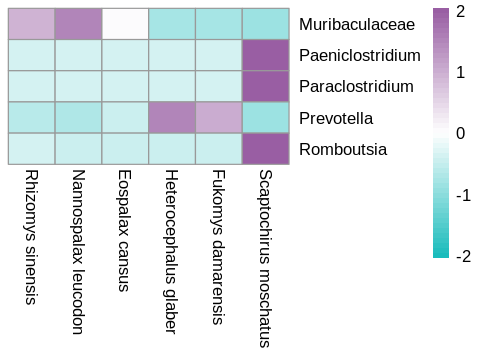

In [27]:
# 对行进行标准化并画热图
library(pheatmap)
p1=pheatmap(genus_1,scale = "row",
            display_numbers = F,
            cluster_rows = F,
            cluster_cols = F,
            color = colorRampPalette(c("#1abcbc", "white", "#995ea3"))(50))
options(repr.plot.width=4, repr.plot.height=3)
pdf("genus.pdf")
p1
dev.off()

In [19]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /public/home/lyx/anaconda3/envs/r4.1/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12 vegan_2.6-6.1   lattice_0.22-5  permute_0.9-7  
 [5] stringr_1.5.1   ape_5.7-1       phyloseq_1.39.1 ggplot2_3.4.4  
 [9] tidyr_1.3.0     dplyr_1.1.4     jsonlite_1.8.7 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.11            Biostrings_2.62.0      digest_0.6.33 